# PW 1 - Markovian models  
Sampling of Markovian models.

The aim of this session is to program the Gibbs sampler algorithm and study it in the binary case.

In this section we consider a binary Markov random field (taking values in $E=\{0,1\}$).
The neighborhood is defined in 4-connexity and the potential of a clique of order 2 is defined by :
$U_c(0,1)=U_c(1,0)=+\beta$ and $U_c(1,1)=U_c(0,0)=0$ (the potential for singleton clique is 0).


In [1]:
import math
import random
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
import imageio
from scipy import ndimage as ndi

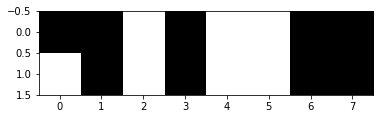

In [2]:
plt.set_cmap('gray')

sh=[2,8]

imaU=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaU)

#Q1
For the Ising model defined above, and the imaU generated in the previous cell, give the formula of the global energy and give its value as a function of $\beta$ for imaU.



#A1
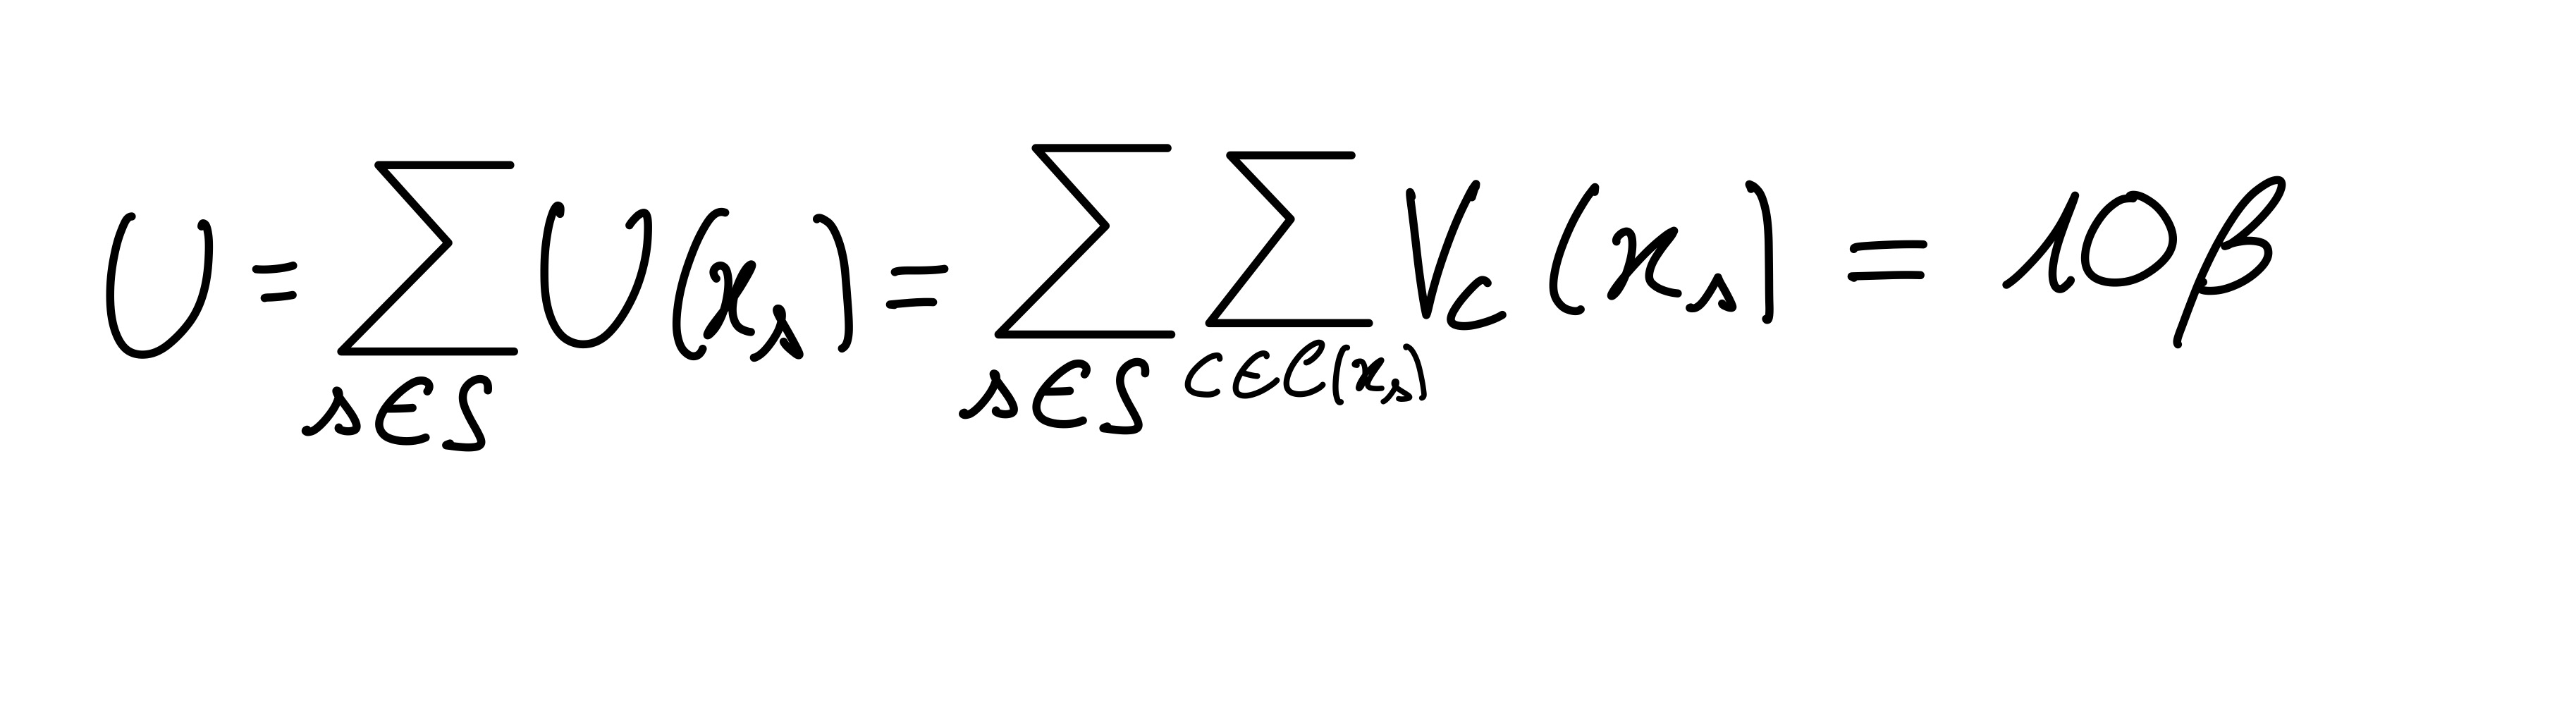


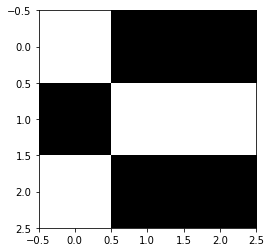

In [3]:
sh=[3,3]

imaVois=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaVois)

#Q2

Write the general form of the local conditional probability in a pixel $s$. For the neighborhood configuration imaVois generated by the previous code cell, compute the 2 local conditional energies (for the value 0 and for the value 1 of the central pixel), then the local conditional probabilities (as a function of $\beta$). What is the most probable class ? (NB: do the calculation for an 8-neighborhood).


#A2
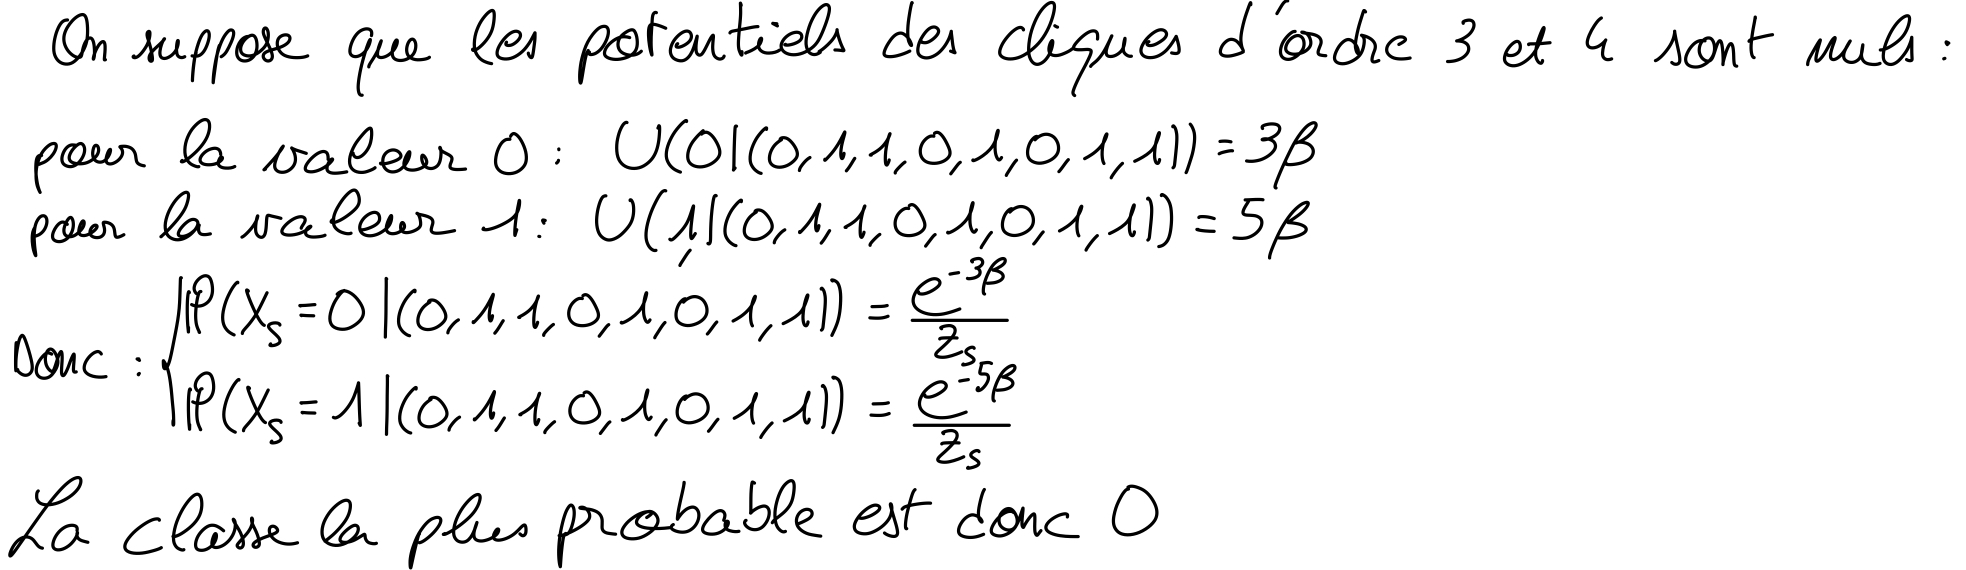


## Part 1

Programming the Gibbs sampler and drawing samples of Markovian models



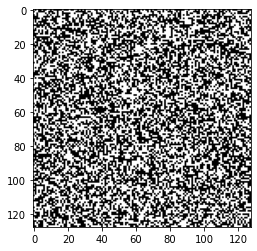

In [25]:
plt.set_cmap('gray')

sh=[128,128]

im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

### Sampling function
Complete the following function which takes as input a binary image (which will be updated by Gibbs sampling) and the value of the regularization parameter.


In [147]:
def echan(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            list_i = [i,i1,i2]
            list_j = [j,j1,j2]
            neighbour = [(indice_i,indice_j) for indice_i in list_i for indice_j in list_j] #on génère un voisinage en 8-connexité
            neighbour.remove((i,j)) #on enlève le pixel central de son voisinage
            Ureg0= sum([im_bin[indices] for indices in neighbour])*beta_reg
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1= sum([1-im_bin[indices] for indices in neighbour])*beta_reg
            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin

#Q3
Run the program several times. Do you still get the same image? Comment on this.

#A3
Non on obtient pas rigoureusement la même image car l'échantillonage de Gibbs donne 2 images qui sont des échantillons d'une même loi et initialisées de la même manière, ce qui induit de fortes ressemblances entre les 2 mais pas d'égalité rigoureuse. En effet, à chaque étape il y a un tirage aléatoire, qui introduit des différences entre les 2 images si on ne fixe pas la même seed d'aléa.

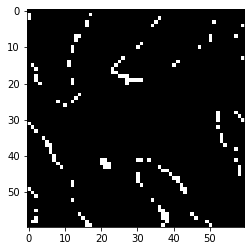

In [159]:
im_bin1 = np.copy(im_bin)
im_bin2 = np.copy(im_bin)
plt.imshow(np.abs(echan(im_bin1,1)-echan(im_bin2,1)))


By varying the value of the regularization parameter and restarting the cell, observe. You can remove the visualization during sampling and increase the number of iterations

#Q4

Vary $\beta$ from 0.5 to 20. Comment on the results.

#A4 
On voit que lorsqu'on augmente $\beta$, on obtient de agglomérations de pixels plus régulières. Pour $\beta$ = 0.5 on peut voir plein de petits pixels noirs ou blancs isolés parmis des pixels de couleur opposée, ce qui n'est plus le cas pour $\beta$ = 1 mais dont les frontières des formes sont irrégulières et enfin pour $\beta$ = 20 on a plus de pixels opposés ni de frontière très irrégulière 

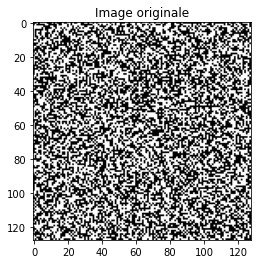

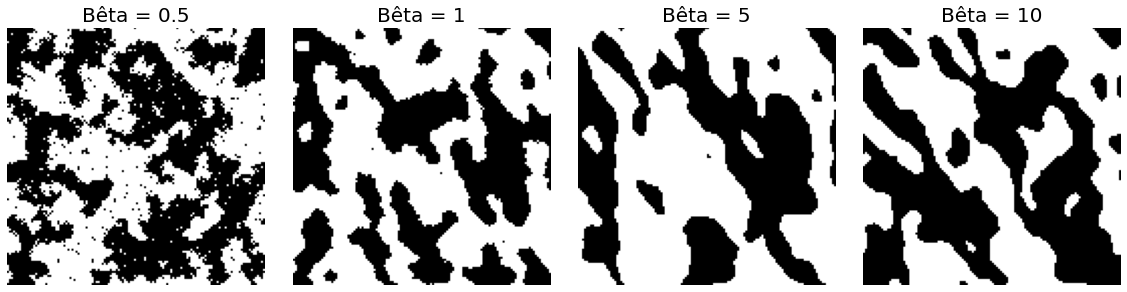

In [181]:

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)
plt.title('Image originale')
plt.show()

beta_regs = [0.5,1,5,10,20]
fig,axes = plt.subplots(1,4,figsize=(16,4))

for beta_reg,ax in zip(beta_regs,axes):
    im = np.copy(im_bin)
    for n in range(10):
        echan(im,beta_reg)
    ax.imshow(im)
    ax.set_title(f'Bêta = {beta_reg}',fontsize=20)
    ax.axis('off')

plt.tight_layout()
plt.show()

#Q5
Which image minimizes the overall energy for this model?

#A5
L'image uniforme (que des 0 ou que des 1) est celle qui minimise l'énergie totale pour ce modèle : en effet l'énergie est forcément positive si bêta est positif, or pour une image uniforme tous les pixels sont identiques donc tous les potentiels sont nuls et ainsi l'énergie est nulle, et comme elle est positive elle atteint son minimum.

#Q6
Change 𝛽 and give it a negative value. Describe the result and justify it.

#A6
Lorsqu'on choisit une valeur de bêta négative, on favorise les pixels adjacents différents pour les 2 couleurs (noir et blanc) mais si on entour chaque pixel noir de pixels blancs (donc aucun pixel noir adjacent dans n'importe quelle direction) alors ce sont les pixels blancs qui seront adjacents en grand nombre. Il est donc nécessaire de trouver un compromis entre les 2, ce qui crée donc une image avec des lignes noirs et blanches alternées.

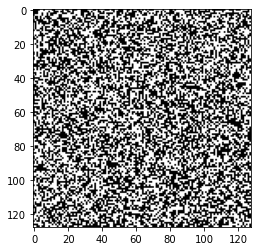

<Figure size 432x288 with 0 Axes>

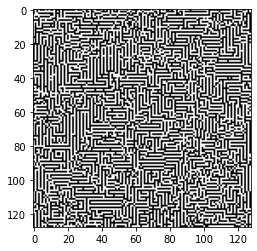

In [151]:
# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)
plt.show()

beta_reg=-1

mafigure=plt.figure()
mafigure.canvas.draw()


for n in range(10):
    echan(im_bin,beta_reg)
    mafigure.canvas.draw()


plt.figure()
plt.imshow(im_bin)
plt.show()

#Q7
We now work in 8-neighborhood, but still with cliques of order 2 (non-isotropic this time). For each of the following images, propose the clique potentials that allow us to obtain these realizations. Initially all clique potentials are zero.


* Image A : there is only one clique potential of order 2 which is -1.
* Image B : in addition to the previous one, there is a clique potential of order 2 which is 1. Indicate which one.
* Image C: in addition to the 2 previous ones, there is a clique potential of order 2 which is -1. Indicate which one.
* Image D: in addition to the 3 previous ones, there is a second order clique potential which is +1. Indicate which one.





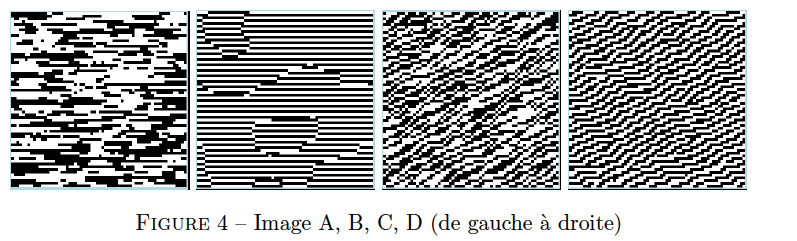

#A7
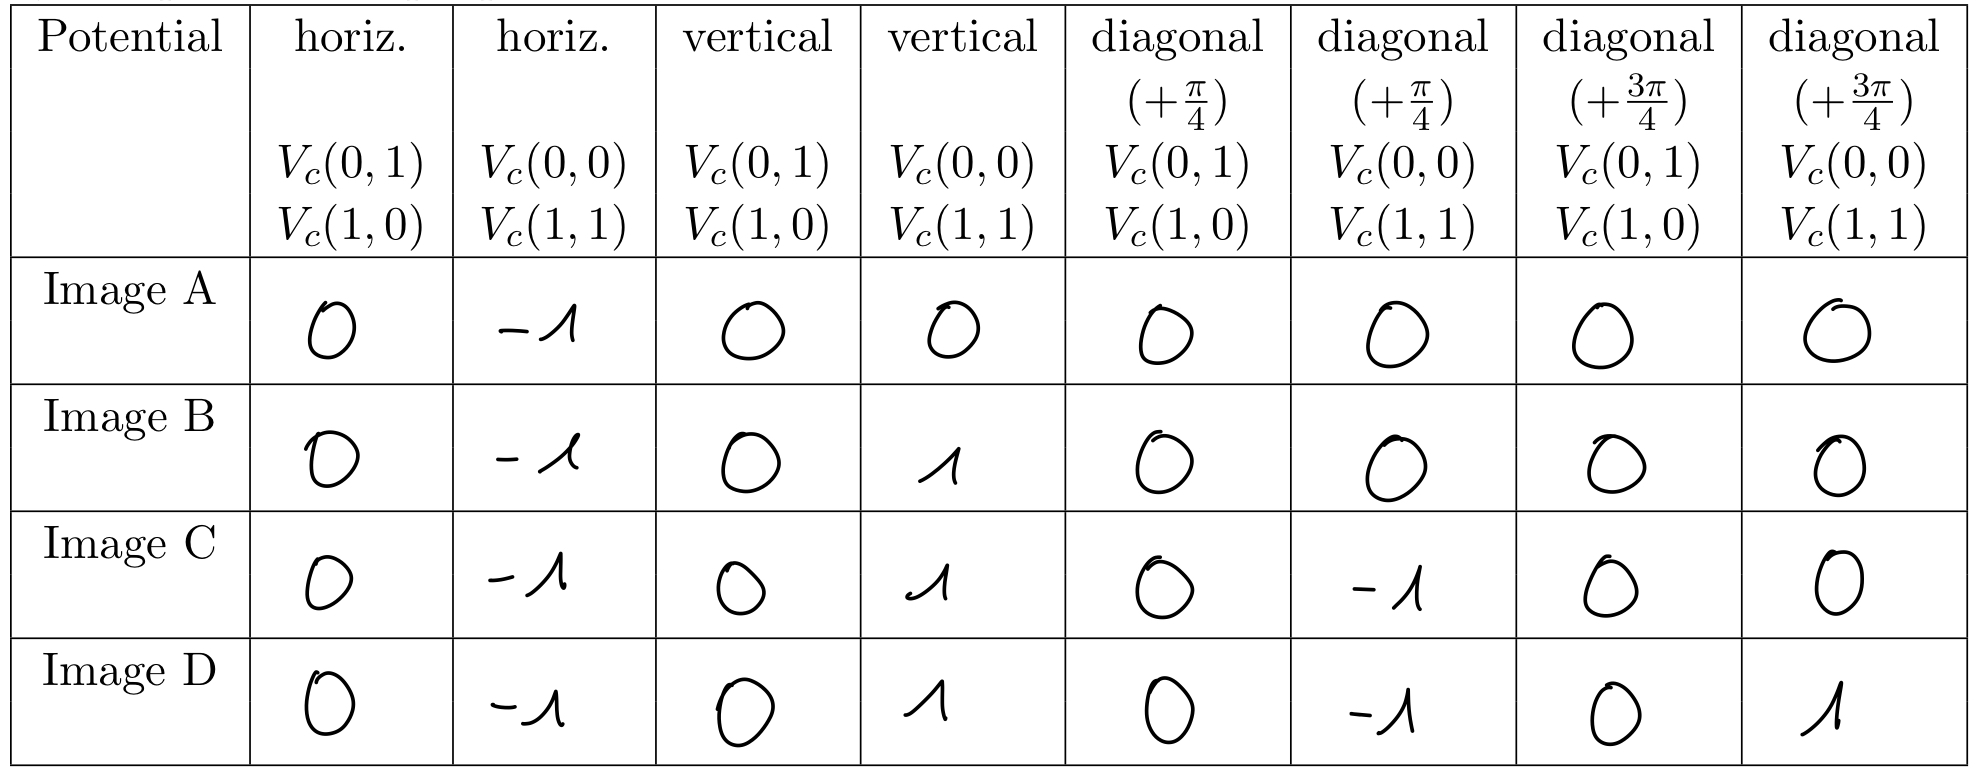

In [111]:
def a(im_bin):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            neighbour_interest = [(i,j1),(i,j2)]
            Ureg0= sum([1-im_bin[indices] for indices in neighbour_interest])*(-1)
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1= sum([im_bin[indices] for indices in neighbour_interest])*(-1)
            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin

def b(im_bin):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            neighbour_pos = [(i1,j),(i2,j)]
            neighbour_neg = [(i,j1),(i,j2)]
            Ureg0_pos= sum([1-im_bin[indices] for indices in neighbour_pos])
            Ureg0_neg= sum([1-im_bin[indices] for indices in neighbour_neg])
            Ureg0 = Ureg0_pos - Ureg0_neg
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1_pos= sum([im_bin[indices] for indices in neighbour_pos])
            Ureg1_neg= sum([im_bin[indices] for indices in neighbour_neg])
            Ureg1 = Ureg1_pos - Ureg1_neg
            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin

def c(im_bin):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            neighbour_pos = [(i1,j),(i2,j)]
            neighbour_neg = [(i,j1),(i,j2),(i1,j2),(i2,j1)]
            Ureg0_pos= sum([1-im_bin[indices] for indices in neighbour_pos])
            Ureg0_neg= sum([1-im_bin[indices] for indices in neighbour_neg])
            Ureg0 = Ureg0_pos - Ureg0_neg
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1_pos= sum([im_bin[indices] for indices in neighbour_pos])
            Ureg1_neg= sum([im_bin[indices] for indices in neighbour_neg])
            Ureg1 = Ureg1_pos - Ureg1_neg
            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin

def d(im_bin):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            neighbour_pos = [(i1,j),(i2,j),(i1,j1),(i2,j2)]
            neighbour_neg = [(i,j1),(i,j2),(i1,j2),(i2,j1)]
            Ureg0_pos= sum([1-im_bin[indices] for indices in neighbour_pos])
            Ureg0_neg= sum([1-im_bin[indices] for indices in neighbour_neg])
            Ureg0 = Ureg0_pos - Ureg0_neg
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1_pos= sum([im_bin[indices] for indices in neighbour_pos])
            Ureg1_neg= sum([im_bin[indices] for indices in neighbour_neg])
            Ureg1 = Ureg1_pos - Ureg1_neg
            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin

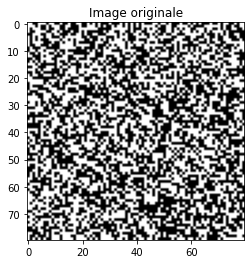

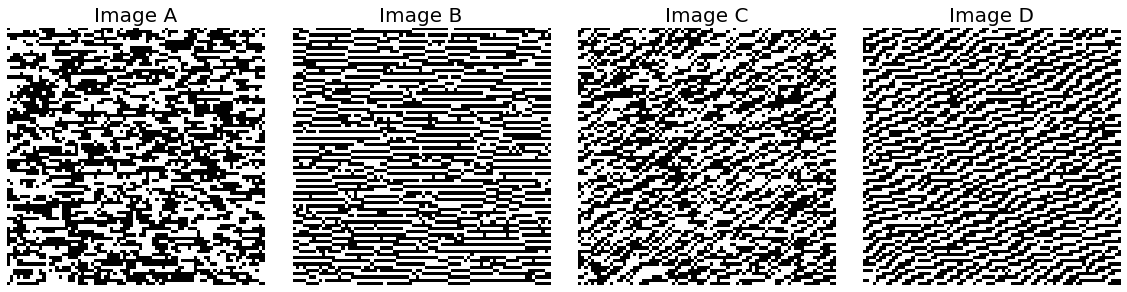

In [180]:

# random initialization of im_bin
plt.set_cmap('gray')
sh=[80,80]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)
plt.title('Image originale')
plt.show()

im_a,im_b,im_c,im_d = np.copy(im_bin),np.copy(im_bin),np.copy(im_bin),np.copy(im_bin)


for n in range(10):
    a(im_a)
    b(im_b)
    c(im_c)
    d(im_d)

images = [im_a,im_b,im_c,im_d]
titles = ['Image A','Image B','Image C','Image D']

fig,axes = plt.subplots(1,4,figsize=(16,4))

for ax,im,title in zip(axes,images,titles):
    ax.imshow(im)
    ax.set_title(title,fontsize=20)
    ax.axis('off')
plt.tight_layout()
plt.show()

#Q8

Modify your program to define an Ising model with a diagonal attractive potential only (the other potentials are zero). It means that this model **encourages** similar labels (either 0 or 1) for neighboring pixels in the diagonal directions ($\pi/4$ or $3\pi/4$ directions). Comment on the result.

#A8 Ce modèle favorise des diagonales constantes, ce qui crée des zones entièrement constantes, blanches ou noires, qui ont donc a fortiori des diagonales constantes. Et des zones de damier, qui ont également des diagonales constantes. Si on souhaitait créer un véritables damier, on pourrait introduire une nouvelle clique horizontale ou verticale dont le potentiel favorise des pixels adjacents différents.

In [165]:
def diag(im_bin):
    
    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            neighbour_interest = [(i1,j1),(i2,j2),(i1,j2),(i2,j1)]
            Ureg0= sum([1-im_bin[indices] for indices in neighbour_interest])*(-1)
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1= sum([im_bin[indices] for indices in neighbour_interest])*(-1)
            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin

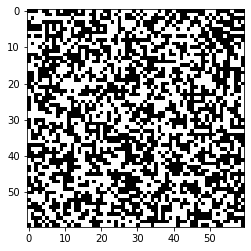

<Figure size 432x288 with 0 Axes>

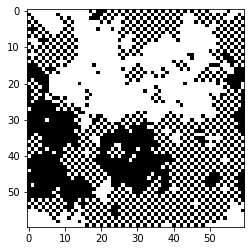

In [172]:

# random initialization of im_bin
plt.set_cmap('gray')
sh=[60,60]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)
plt.show()


mafigure=plt.figure()
mafigure.canvas.draw()


for n in range(50):
    diag(im_bin)
    mafigure.canvas.draw()


plt.figure()
plt.imshow(im_bin)
plt.show()